# `"boxplot_outlier"` Statistics

Computes outlier values on `"box-plot"` chart but can be used in alternative visualizations as well.

In [1]:
import pandas as pd
from lets_plot import *
from lets_plot.mapping import as_discrete


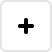
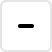
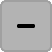
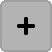
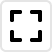
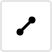
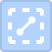
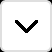
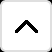
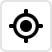
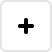
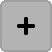
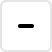
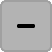
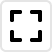
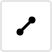
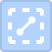
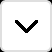
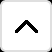
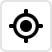

In [2]:
LetsPlot.setup_html()

In [3]:
mpg = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')
mpg.head(3)

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [4]:
p = (ggplot(mpg, aes(
                    x=as_discrete('class', order_by='..middle..', order=1),
                    y='hwy'
                    )) 
     + scale_color_viridis(option="magma", end=0.8) 
     + ggsize(700, 400))

In [5]:
p + geom_boxplot(aes(color='..middle..'))

#### 1. Show Just Outliers

Use `stat="boxplot_outlier"`.

In [6]:
outliers = geom_point(aes(color='..middle..'), stat="boxplot_outlier")

p + outliers

#### 2. Add Ribbons and Mid-points

In [7]:
ribbon = stat_summary(aes(
            ymin='..lq..', 
            ymax='..uq..'), geom='ribbon')


p + ribbon

In [8]:
ribbon1 = geom_ribbon(aes(
                    ymin="..ymin..",
                    ymax="..ymax..",), stat="boxplot")

ribbon2 = geom_ribbon(aes(
                    ymin="..lower..",
                    ymax="..upper.."), stat="boxplot")

mid_points = geom_point(aes(y="middle"), stat="boxplot")

# p + ribbon1 + ribbon2 + mid_points + outliers
p + ribbon1 + ribbon2 + outliers

---

In [9]:
p2 = (
    ggplot(mpg, aes(
        x=as_discrete('class', order_by='..y..', order=1),
        y='hwy'
    ))
    + scale_color_viridis(option="magma", end=0.8) 
    + ggsize(700, 400)
)

ribbon2 = stat_summary(geom='ribbon', fun='mq', fun_min='lq', fun_max='uq')

p2 + ribbon2

In [10]:
p3 = (
    ggplot(mpg, aes(
        x=as_discrete('class', order_by='..mq..', order=1),
        y='hwy'
    ))
    + scale_color_viridis(option="magma", end=0.8) 
    + ggsize(700, 400)
)

ribbon3 = stat_summary(aes(middle='..mq..'), geom='boxplot', fun_min='lq', fun_max='uq')

p3 + ribbon3